## Data manipulation

In the following notebook we export and concatenate three years of data related to Carbon Intensity in Italy, plotting and analysing it

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
import sys
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

f2021 = "../IT-NO_2021_hourly.csv"
f2022 = "../IT-NO_2022_hourly.csv"
f2023 = "../IT-NO_2023_hourly.csv"

dataset1 = pd.read_csv(f2021)
dataset2 = pd.read_csv(f2022)
dataset3 = pd.read_csv(f2023)

In [2]:
# Data concatenation
dataset_CI = pd.concat([dataset1, dataset2, dataset3], axis=0)

dataset_CI['Datetime (UTC)'] = pd.to_datetime(dataset_CI['Datetime (UTC)'])
dataset_CI.rename(columns={'Datetime (UTC)': 'timestamp'}, inplace=True) # Column renaming
dataset_CI.set_index('timestamp', inplace=True)

dataset_CI.drop(columns=['Country', 'Zone Name', 'Zone Id', 'Data Source', 'Data Estimated', 'Data Estimation Method'], inplace=True)
dataset_CI

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
timestamp,,,,
2021-01-01 00:00:00,303.29,389.74,35.12,30.82
2021-01-01 01:00:00,303.45,387.76,36.15,33.12
2021-01-01 02:00:00,295.04,377.86,37.89,33.65
2021-01-01 03:00:00,295.56,380.36,37.14,32.05
2021-01-01 04:00:00,308.06,394.66,34.50,31.71
...,...,...,...,...
2023-12-31 19:00:00,260.51,333.72,46.38,36.24
2023-12-31 20:00:00,265.88,342.93,43.68,32.08
2023-12-31 21:00:00,250.60,324.02,47.82,32.64


## Plotting

In [3]:
# Method to plot the Carbon intensity data
def showplot(x, y, size, title, color):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.ylabel('gCO₂eq/kWh')
    plt.title(title)
    plt.plot(x, y, color=color)
    plt.show

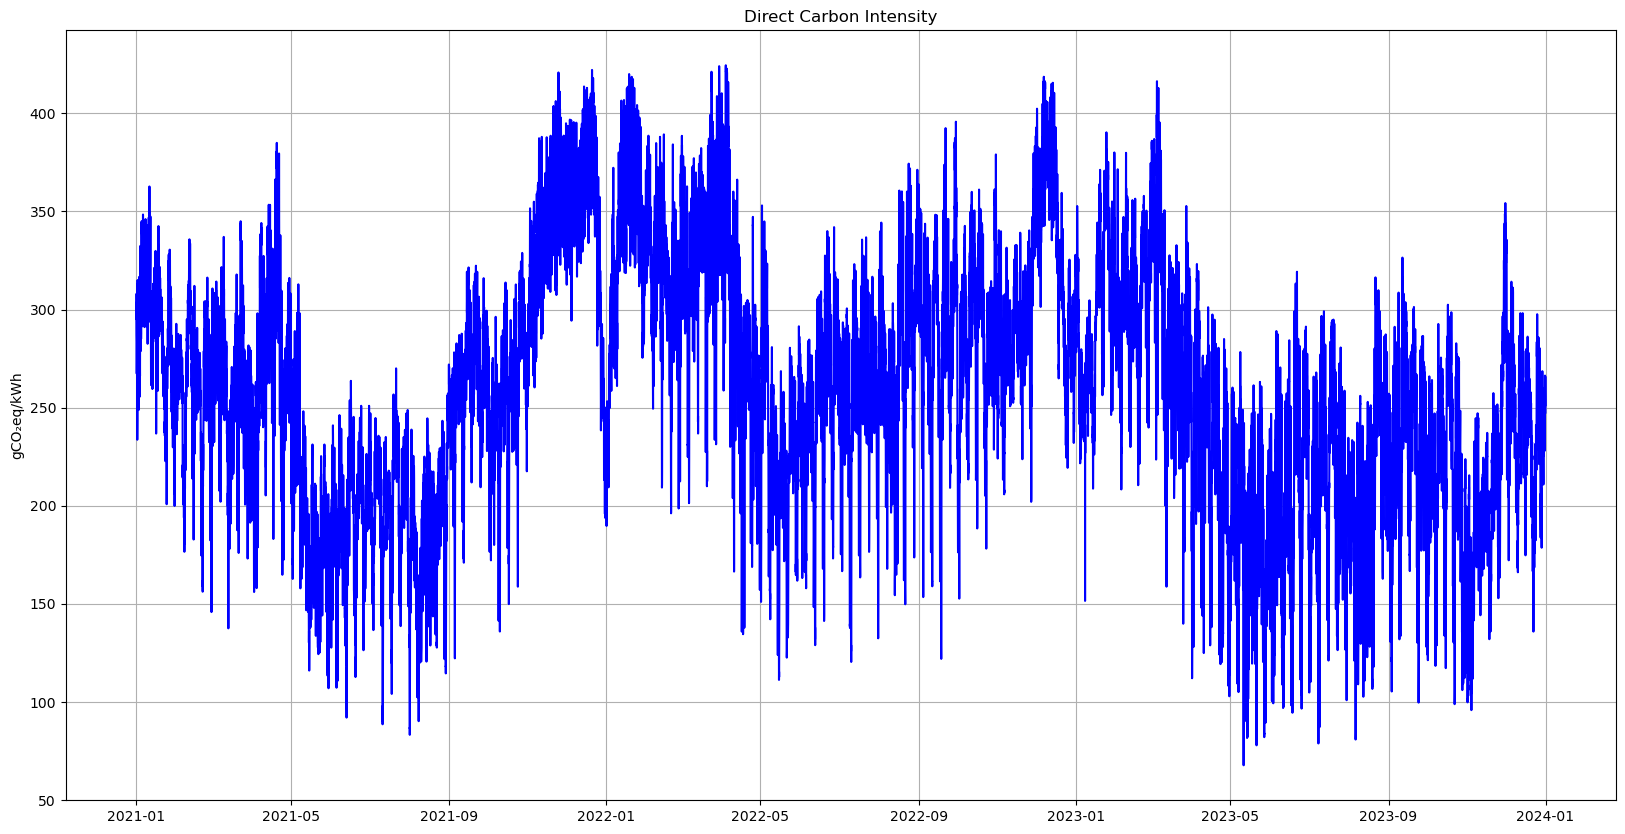

In [9]:
showplot(dataset_CI.index, dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)'], (20, 10), 'Direct Carbon Intensity', 'blue')

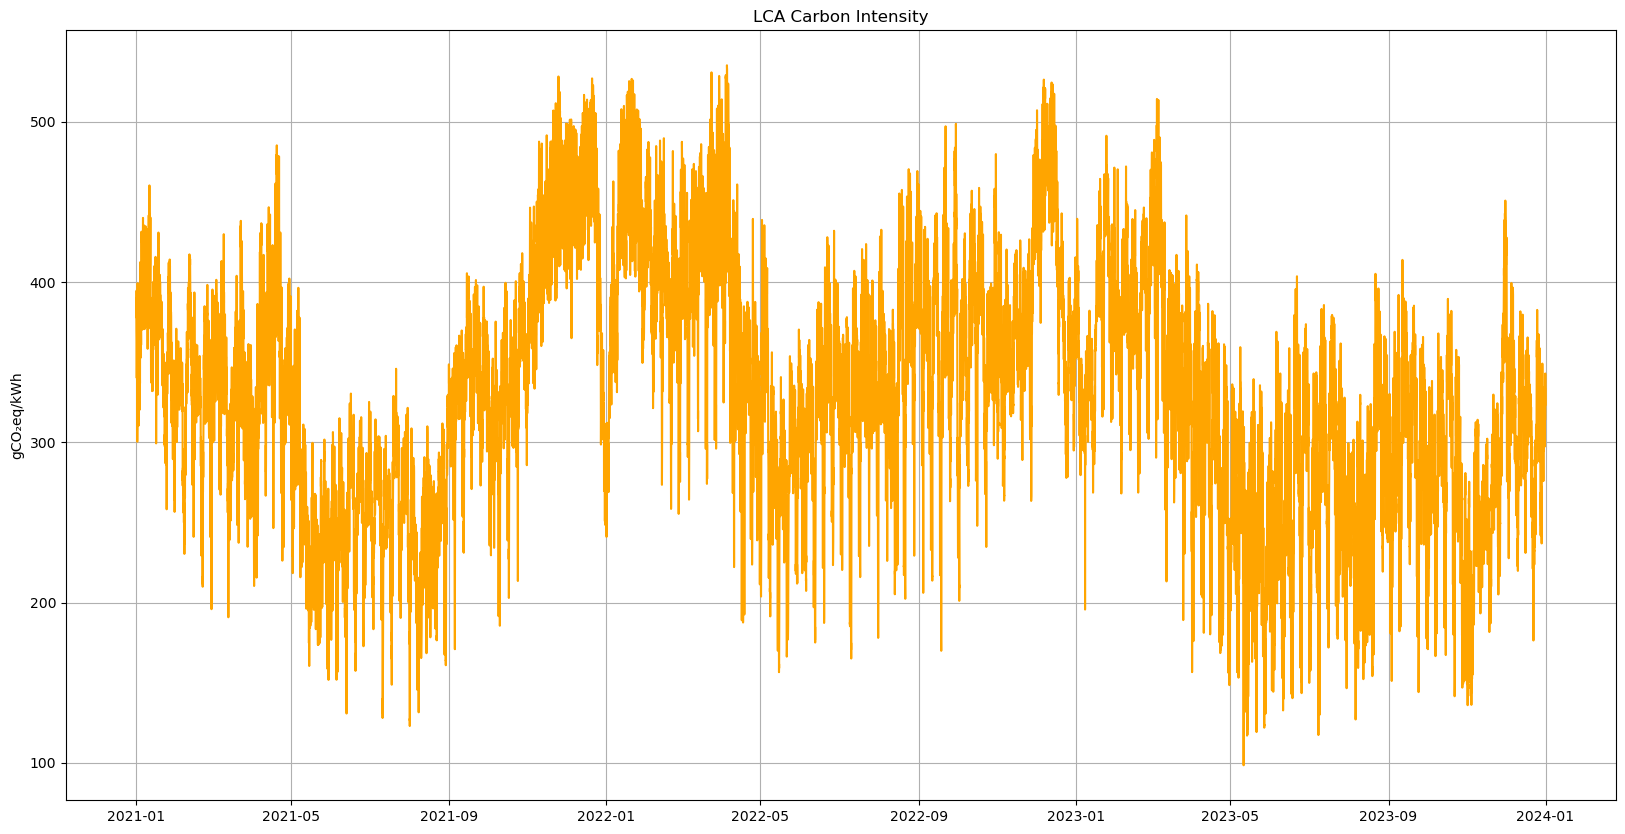

In [10]:
showplot(dataset_CI.index, dataset_CI['Carbon Intensity gCO₂eq/kWh (LCA)'], (20, 10), 'LCA Carbon Intensity', 'orange')

In [4]:
# Addition of a new column, made from the sum of the two CI values
dataset_CI['LCA+direct'] = dataset_CI['Carbon Intensity gCO₂eq/kWh (LCA)'] + dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)']
dataset_CI

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,LCA+direct
timestamp,,,,,
2021-01-01 00:00:00,303.29,389.74,35.12,30.82,693.03
2021-01-01 01:00:00,303.45,387.76,36.15,33.12,691.21
2021-01-01 02:00:00,295.04,377.86,37.89,33.65,672.90
2021-01-01 03:00:00,295.56,380.36,37.14,32.05,675.92
2021-01-01 04:00:00,308.06,394.66,34.50,31.71,702.72
...,...,...,...,...,...
2023-12-31 19:00:00,260.51,333.72,46.38,36.24,594.23
2023-12-31 20:00:00,265.88,342.93,43.68,32.08,608.81
2023-12-31 21:00:00,250.60,324.02,47.82,32.64,574.62


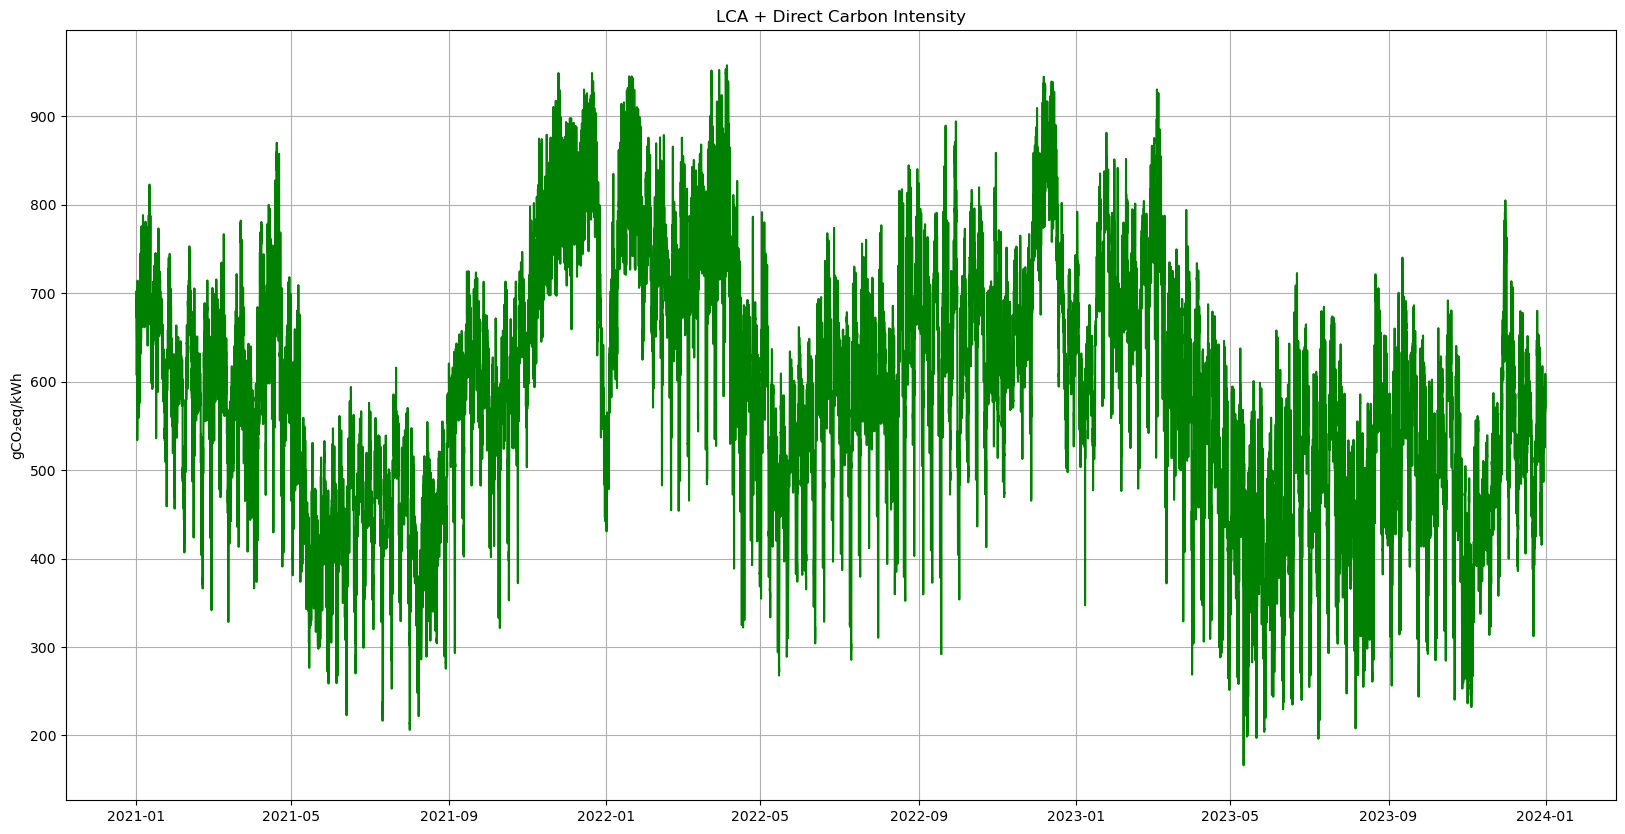

In [11]:
showplot(dataset_CI.index, dataset_CI['LCA+direct'], (20, 10), 'LCA + Direct Carbon Intensity', 'green')

In [5]:
# Dataset exporting as a CSV file for later use
output_file = '../CI_Dataset.csv'
dataset_CI.to_csv(output_file, index_label='timestamp')

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


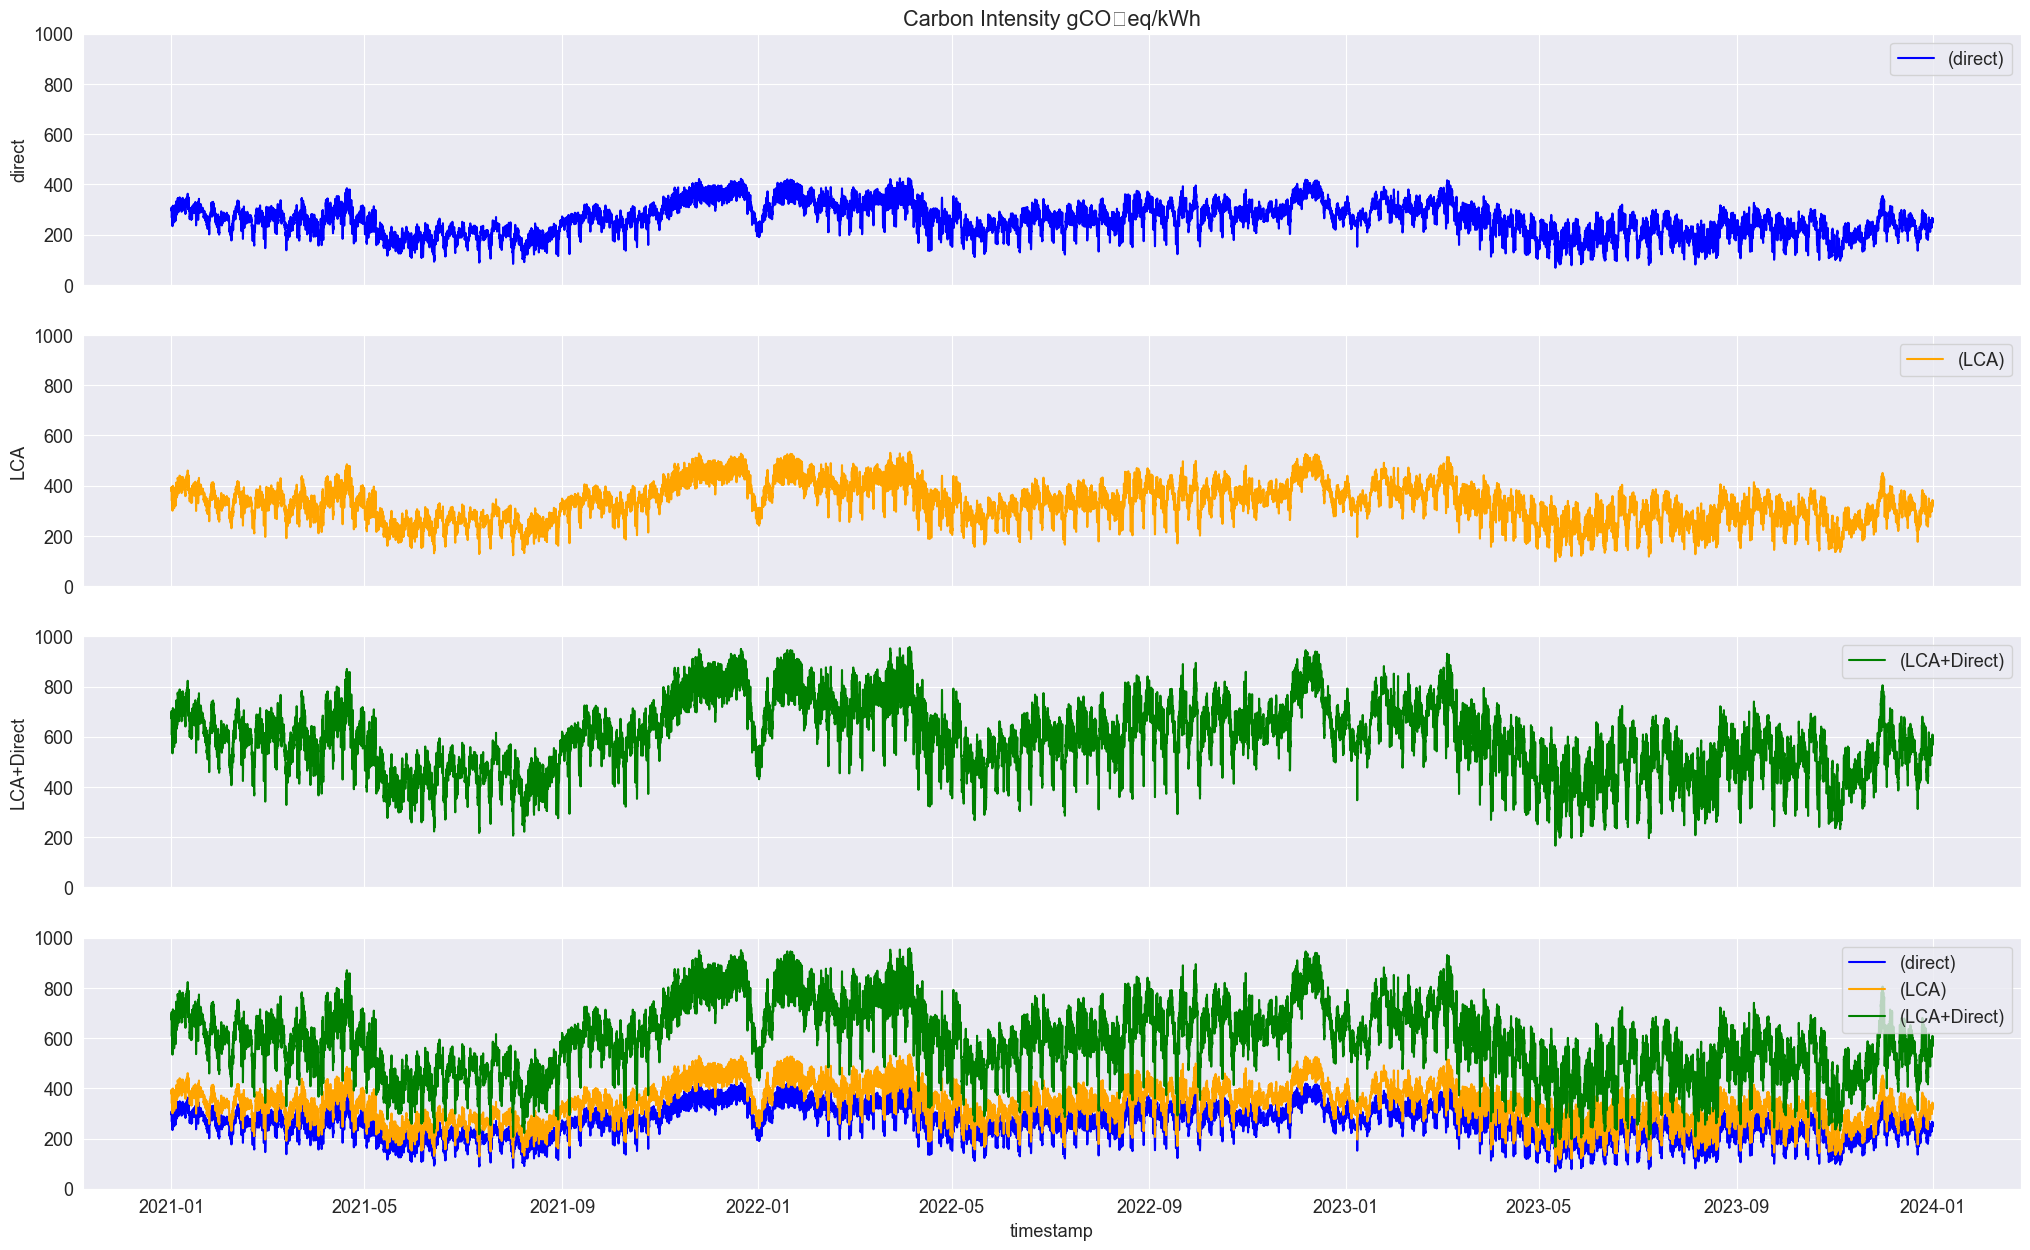

In [46]:
# Plotting and comparison od the different CI values
x = dataset_CI.index
y1 = dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)']
y2 = dataset_CI['Carbon Intensity gCO₂eq/kWh (LCA)']
y3 = dataset_CI['LCA+direct']

# Create subplots with shared X-axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(25, 15), sharex=True)

# Plot data on each subplot
ax1.plot(x, y1, 'b', label='(direct)')
ax1.grid(True)
ax1.set_ylabel('direct')
ax1.set_title('Carbon Intensity gCO₂eq/kWh')
ax1.set_ylim(0, 1000)

ax2.plot(x, y2, 'orange', label='(LCA)')
ax2.grid(True)
ax2.set_ylabel('LCA')
ax2.set_ylim(0, 1000)

ax3.plot(x, y3, 'g', label='(LCA+Direct)')
ax3.grid(True)
ax3.set_ylabel('LCA+Direct')
ax3.set_ylim(0, 1000)

ax4.plot(x, y1, 'b', label='(direct)')
ax4.grid(True)
ax4.plot(x, y2, 'orange', label='(LCA)')
ax4.plot(x, y3, 'g', label='(LCA+Direct)')
ax4.set_ylim(0, 1000)
ax4.set_xlabel('timestamp')

# Add legends
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

# Show the plot
plt.show()


c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.tight_layout()
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


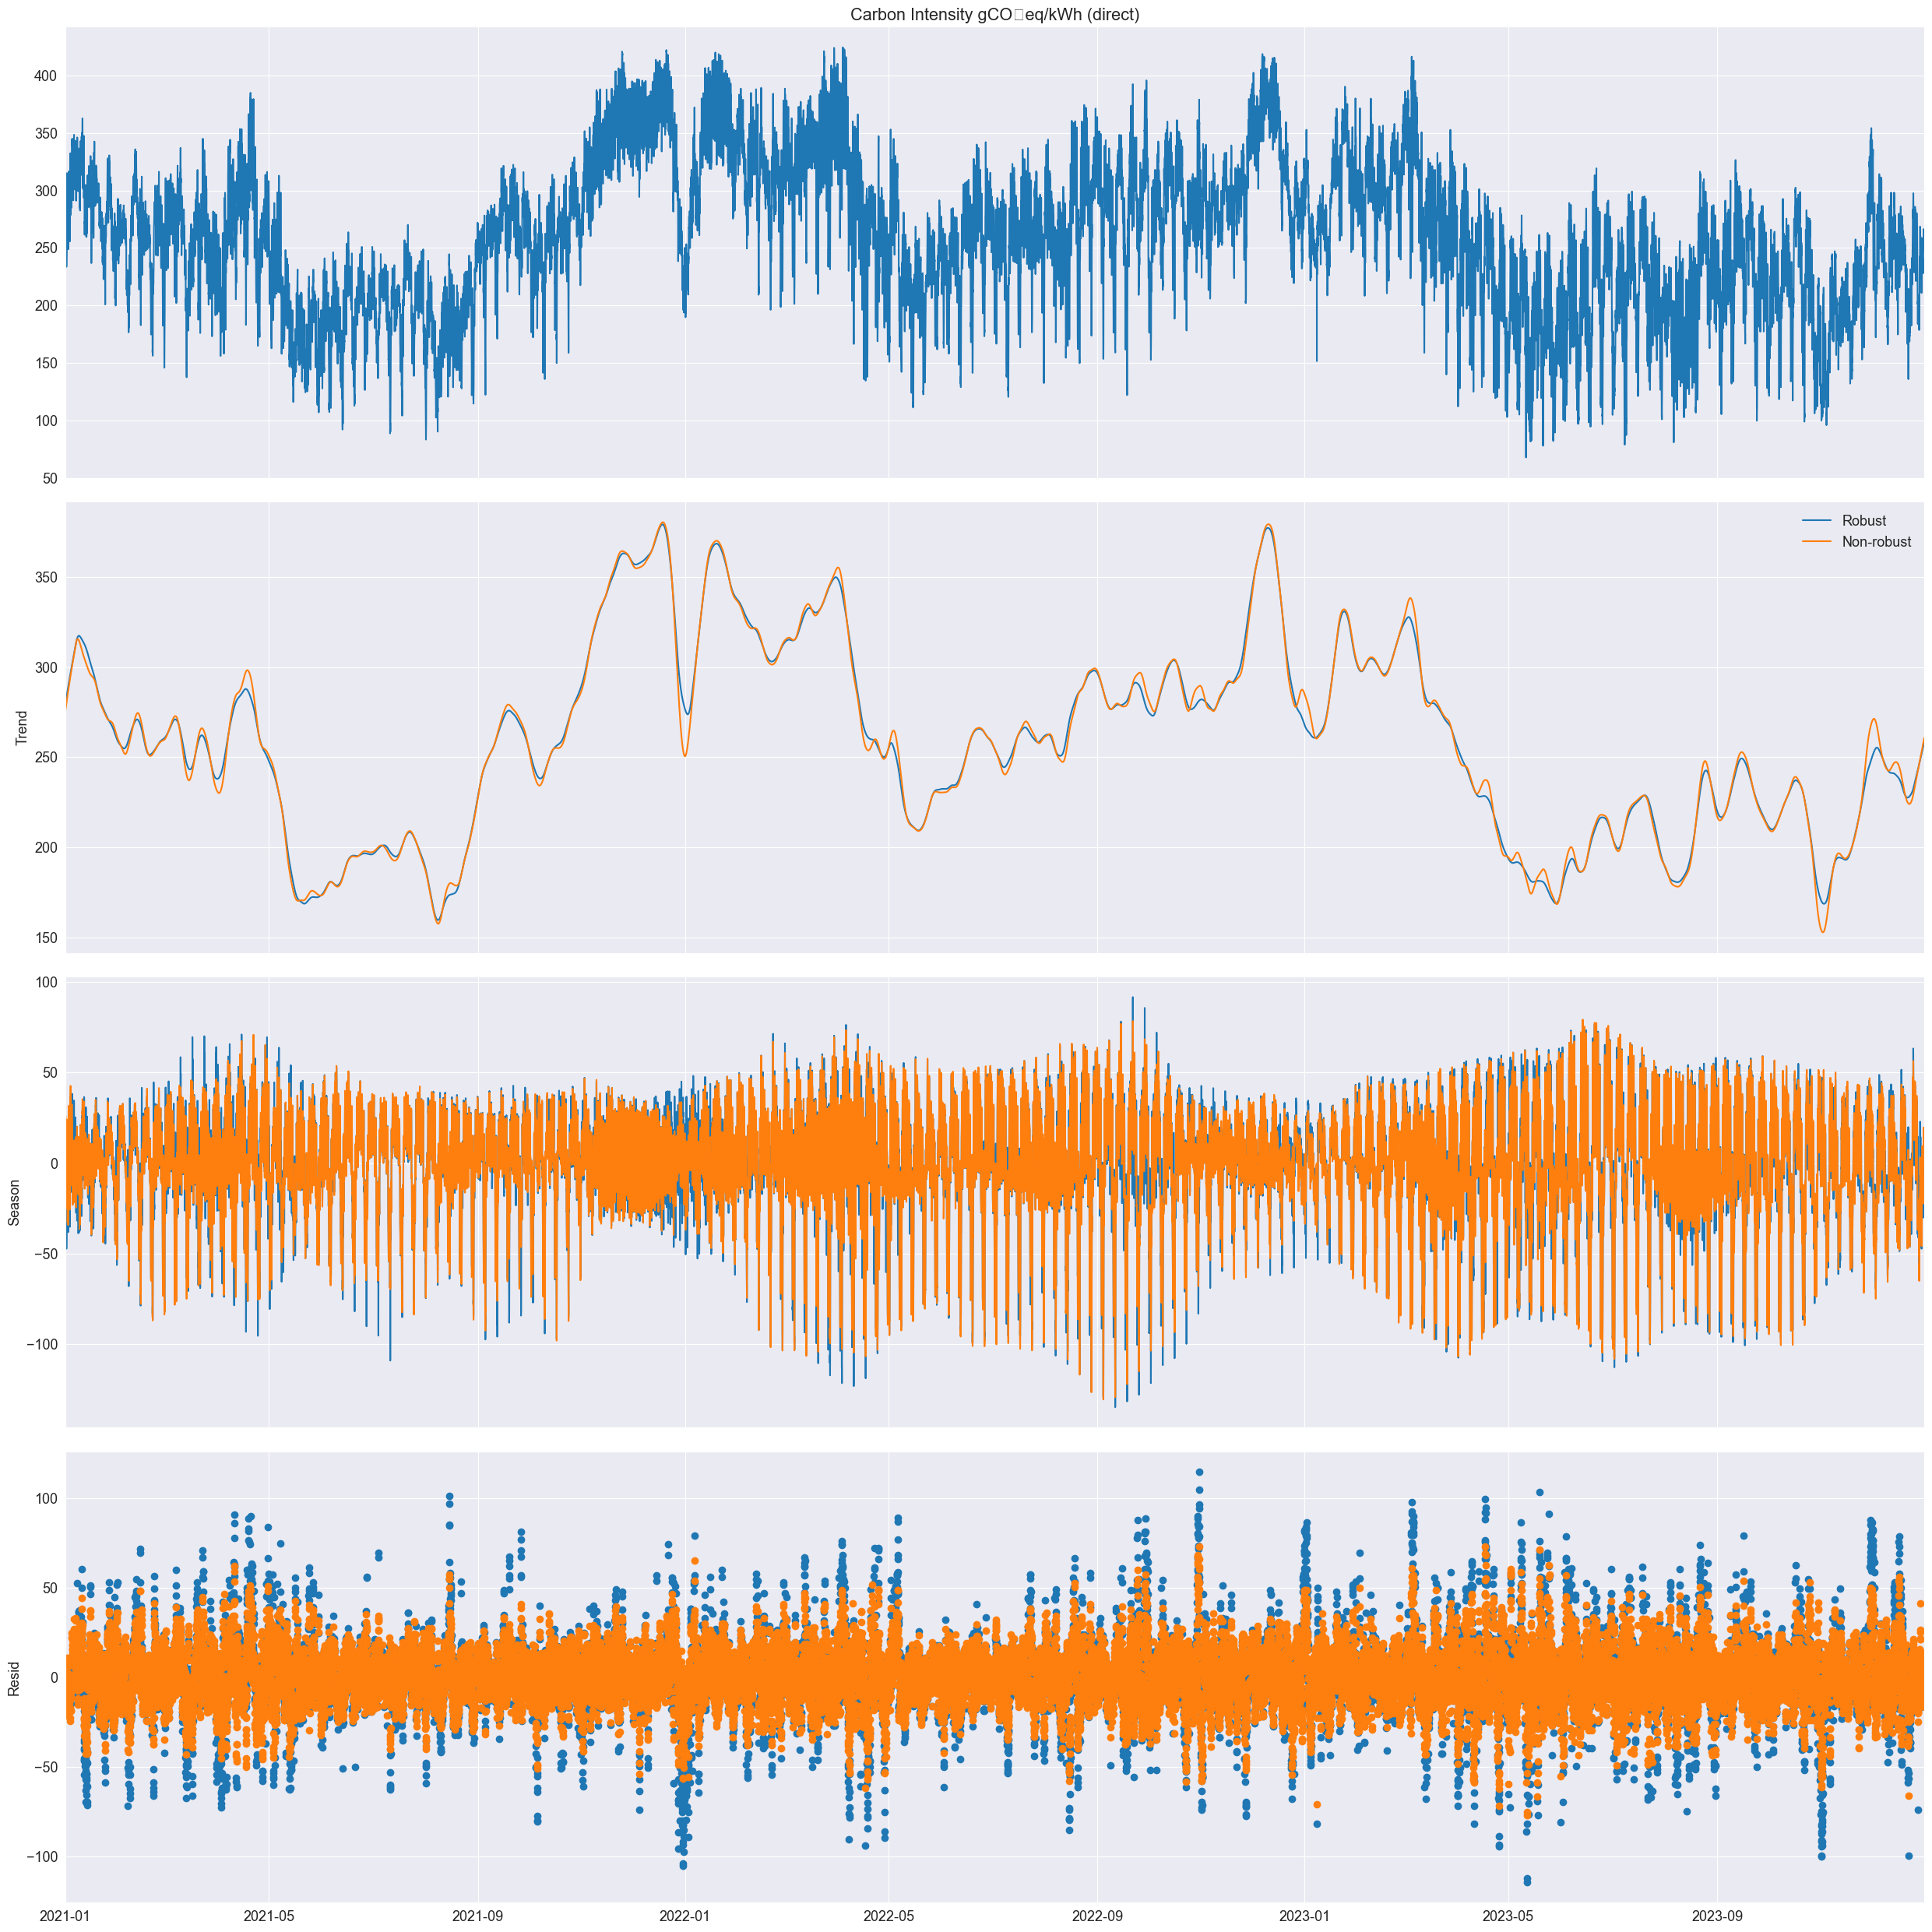

In [12]:
# Seasonal-Trend Decomposition
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)'], period=7*24, robust=True)  # the period is set to one week
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)'], period=7*24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])